In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
#  ### 4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
# ake a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [4]:
gdp_df .head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

In [6]:
gdp_df .tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [7]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [8]:
gdp_df.shape

(7662, 4)

In [9]:
# gdp_df.shape[0]

In [10]:
# gdp_df.shape[1]

In [11]:
gdp_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [12]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [13]:
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [14]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [15]:
gdp_df = gdp_df.drop(columns = ["Value Footnotes"])

In [16]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country',
                                  'Year':'Year',
                                  'Value':'GDP_Per_Capita'})

In [17]:
# gdp_df.columns = ['Country or Area', 'Year', 'GDP_Per_Capita']

In [18]:
# gdp_df.set_axis(["Country", "Year", "GDP_Per_Capita"], axis=1)

In [19]:
# 7. How many countries have data for all years? Which countries are missing many years of data?
# Look at the number of observations per year. What do you notice? 

In [20]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [21]:
gdp_df['Year'].nunique()

33

In [22]:
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [23]:
gdp_df['Year'].sort_values().unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [24]:
gdp_df['Country'].value_counts().reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [25]:
missing_countries = gdp_df.groupby('Country')['Year'].count().sort_values().reset_index()

In [26]:
missing_countries = missing_countries.rename(columns={'Year':'count_of_year'})

In [27]:
missing_countries 

,Country,count_of_year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [28]:
missing_countries .shape

(242, 2)

In [29]:
missing_countries['count_of_year']==33

0      False
1      False
2      False
3      False
4      False
       ...  
237     True
238     True
239     True
240     True
241     True
Name: count_of_year, Length: 242, dtype: bool

In [30]:
missing_countries[missing_countries['count_of_year']==33]

,Country,count_of_year
40,Papua New Guinea,33
41,Pakistan,33
42,Australia,33
43,Pacific island small states,33
44,Austria,33
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [31]:
missing_countries[missing_countries['count_of_year']<33]

,Country,count_of_year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
5,Cayman Islands,16
6,Nauru,19
7,Afghanistan,20
8,CuraÃ§ao,22
9,Palau,22


In [32]:
missing_countries[missing_countries['count_of_year']<33]['Country'].count()

40

In [33]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
# Go to the Python Graph Gallery (https://www.python-graph-gallery.com/)
# and look at the different types of plots under the Distribution section.
# Create a histogram, a density plot, a boxplot, and a violin plot.
# # What do you notice when you look at these plots? How do the plots compare and 
# what information can you get out of one type that you can't necessarily get out of the others?


In [34]:
gdp_2020 = gdp_df[(gdp_df['Year'] == 2020)]

In [35]:
gdp_2020 

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


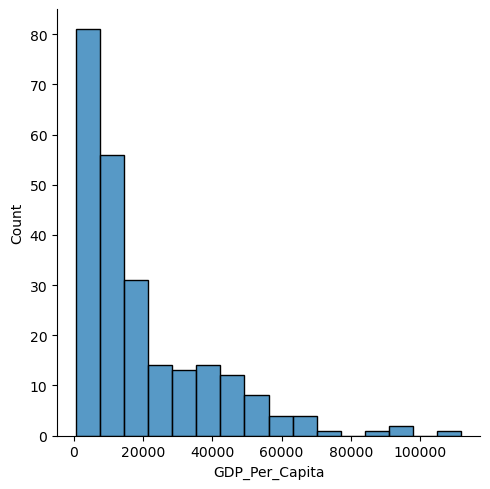

In [36]:
# Histogram using sns
sns.displot( data=gdp_2020 ["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

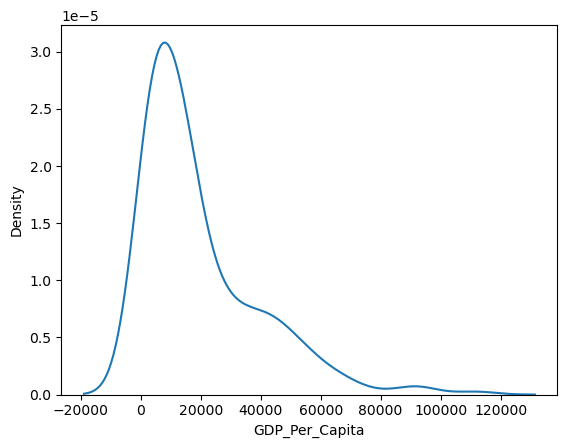

In [37]:
# density plot using
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

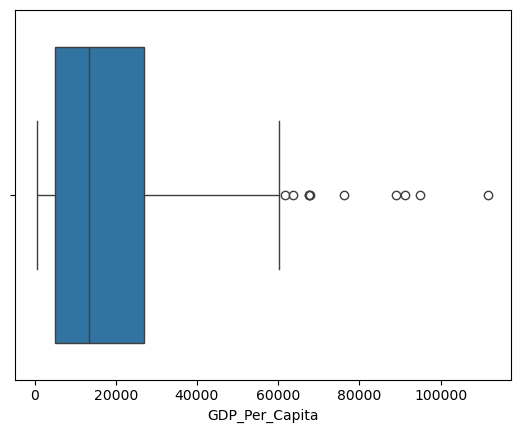

In [38]:
sns.boxplot( x=gdp_2020["GDP_Per_Capita"]
           )
            

<Axes: xlabel='GDP_Per_Capita'>

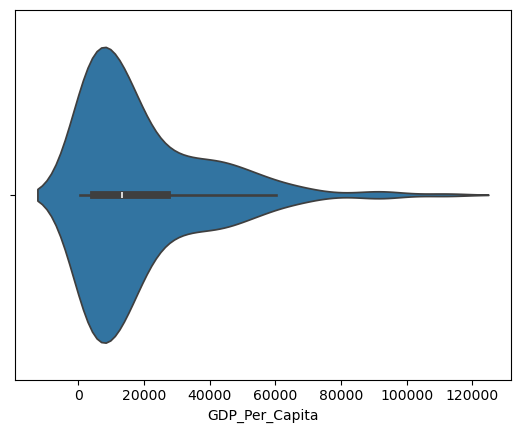

In [39]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])
           

In [40]:
# 9. What was the median GDP per capita value in 2020?

In [41]:
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [42]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [43]:
gdp_df['Year'].isin([1990,2000,2010,2020])

0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661     True
Name: Year, Length: 7662, dtype: bool

In [44]:
gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [45]:
 gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [46]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

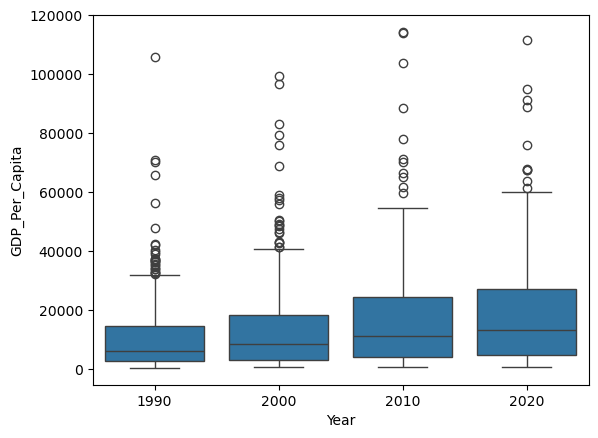

In [47]:
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

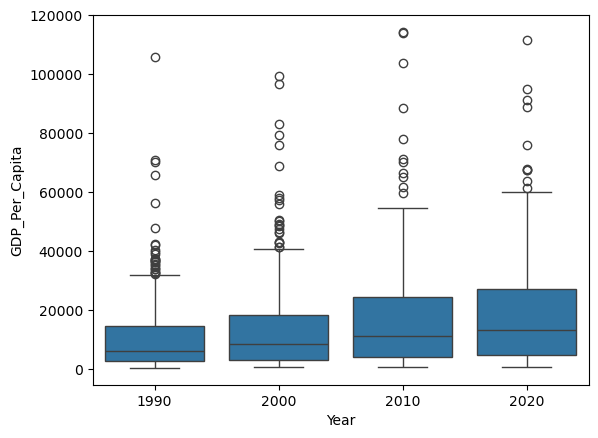

In [48]:
# box plot
sns.boxplot(data = gdp_decades,
            x=gdp_decades["Year"],
           y=gdp_decades['GDP_Per_Capita'])
           
            

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

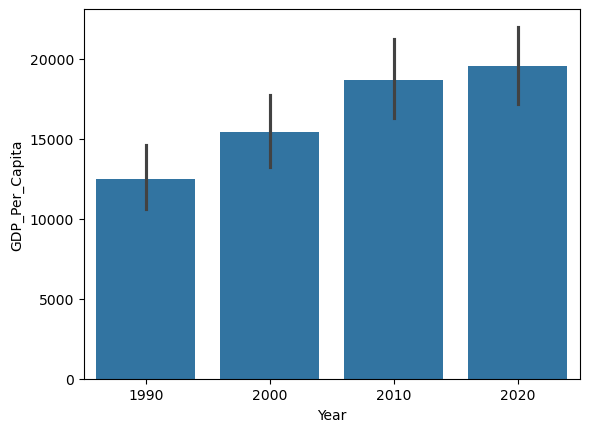

In [49]:
sns.barplot(data = gdp_decades,
            x="Year",
           y='GDP_Per_Capita')

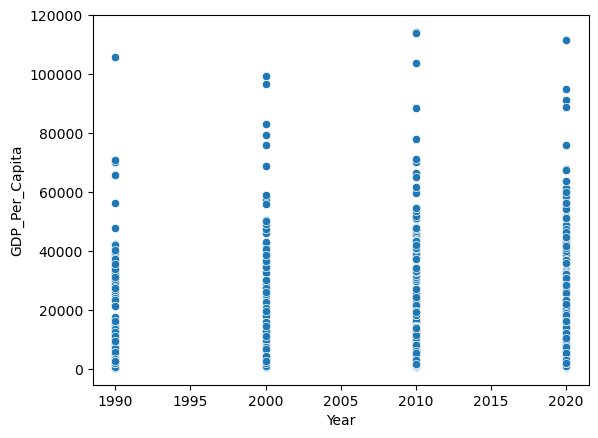

In [50]:
sns.scatterplot(x=gdp_decades['Year'],
                y=gdp_decades['GDP_Per_Capita']
               )
plt.show()

In [51]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [52]:
gdp_df['GDP_Per_Capita']>100000

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: GDP_Per_Capita, Length: 7662, dtype: bool

In [53]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In [54]:
# 12. Which country had the highest GDP per capita in 2020?
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [55]:
gdp_df[gdp_df['Year']==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [56]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [57]:
top_country = gdp_df[gdp_df['Country']=='Luxembourg']

In [58]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


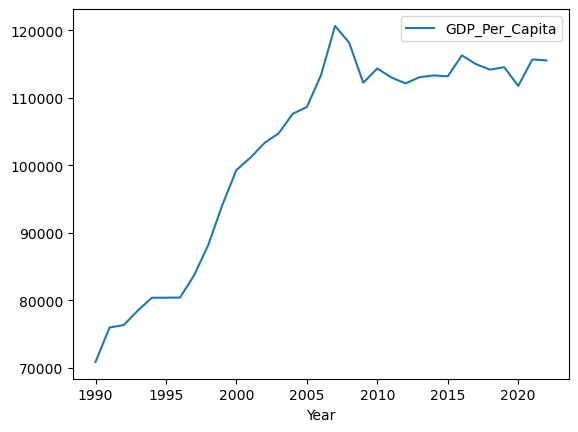

In [59]:
top_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

In [60]:
# 13. Which country had the lowest GDP per capita in 2020? 
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [61]:
gdp_df[gdp_df['Year']==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [62]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [63]:
 gdp_df[gdp_df['Country']==('Burundi')]

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


In [64]:
smallest_country = gdp_df[gdp_df['Country']==('Burundi')]

In [65]:
smallest_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


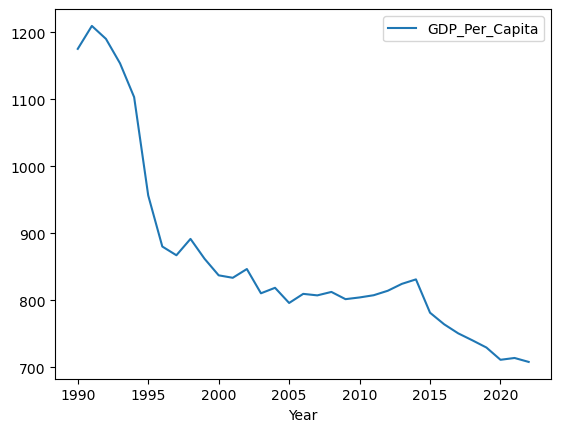

In [66]:
smallest_country.plot(x='Year',
                 y='GDP_Per_Capita',
                 kind='line');

In [67]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`.
# You will likely get errors when doing this. 
# Check the arguments for the read_csv function to find ones that can help correct the errors 
# (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, 
# take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
internet_df = pd.read_csv('../data/internet_use.csv.csv',usecols=[0, 1, 2, 3],nrows=6083)

In [70]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [71]:
internet_df.tail

<bound method NDFrame.tail of      Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN
6082        Zimbabwe  1990   0.000000             NaN

[6083 rows x 4 columns]>

In [72]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [73]:
internet_df.drop(columns = ["Value Footnotes"])

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [74]:
internet_df = internet_df.drop(columns = ["Value Footnotes"])

In [75]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [76]:
internet_df.rename(columns = {'Country or Area':'Country',
                                  'Year':'Year',
                                  'Value':'Internet_Users_Pct'})

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [77]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country',
                                  'Year':'Year',
                                  'Value':'Internet_Users_Pct'})

In [78]:
# 16. Look at the number of observations in this dataset per year. What do you notice?

In [79]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [80]:
internet_df['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1990, 2022, 2021,
       2020, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       2023], dtype=int64)

In [81]:
internet_df['Year'].sort_values()

6082    1990
4988    1990
598     1990
1747    1990
5019    1990
        ... 
3141    2023
1656    2023
1537    2023
340     2023
677     2023
Name: Year, Length: 6083, dtype: int64

In [82]:
internet_df['Year'].sort_values().unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [83]:
# 17. What is the first year to have a non-zero internet users percentage value?

In [109]:
internet_df[internet_df['Internet_Users_Pct']>0]['Year'].min()

1990

In [ ]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [127]:
distribution_year = internet_df[internet_df['Year'].isin([2000,2014])]

In [131]:
distribution_year

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


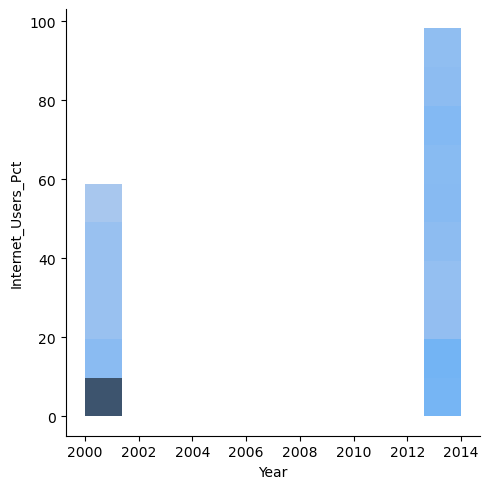

In [159]:
sns.displot( data=distribution_year,
            x="Year",
           y='Internet_Users_Pct')

In [143]:
distribution_year[(distribution_year['Year']==2000)]

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


In [155]:
distribution_year[(distribution_year['Year']==2014)]

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [ ]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [153]:
distribution_year[(distribution_year['Internet_Users_Pct']<5) & (distribution_year['Year']==2014)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [ ]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`. 
# Look at the first and last few rows to confirm that it merged correctly.